<a href="https://colab.research.google.com/github/FaragoFa/Materia-de-aprendizaje/blob/master/ML3-Canciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargo el dataset de canciones

In [515]:
import pandas as pd
#leemos el dataset
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


Filtro las caracteristicas innecesarias

In [516]:
df_filt = df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence','target']]

Especifico caracteristicas a entrenar y target

In [517]:
x = df_filt[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df_filt['target']

Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo

In [518]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Escalo las muestras y los targets para ayudar en el entrenamiento

In [519]:
x = scale(x)   
y = scale(y) 

Creo y entreno el modelo

In [520]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(n_neighbors=40) #K = sqrt(N)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=40)

Obtengo el Score

In [521]:
score = knn.score(xtest, ytest)
score

0.6262376237623762

Testeo

In [522]:
ypred = knn.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

Obtengo el error comparando los targets originales del conjunto de datos de testeo y los targets predichos por el modelo entrenado

In [523]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)  # Error medio cuadrático
print("MSE: ", mse)
print()


MSE:  0.37376237623762376



Probe con varios valores de K pero el resultado no vario mucho. En practicamente todos los casos 1<K<1600 (1600 por el split realizado) el score dio entre 45 y 60. Termine dejando K = raiz(N). Donde obtengo un score cercano a 60.

Por otro lado el MSE me parece muy grande. No entiendo bien a que se debe.

Como los resultados no me convencen voy a ver las distribuciones de las caracteristicas del dataset

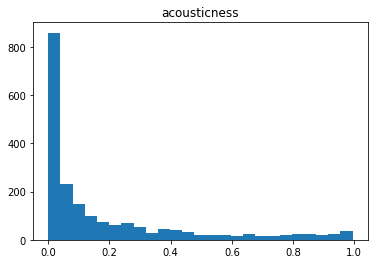

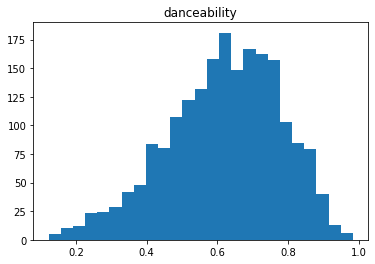

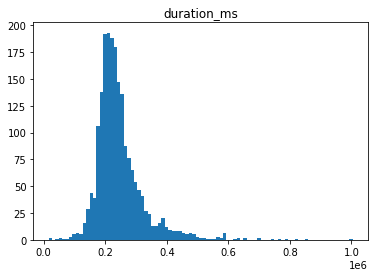

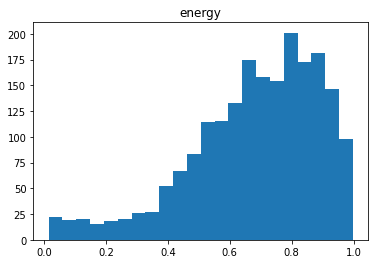

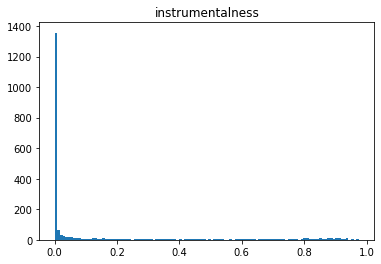

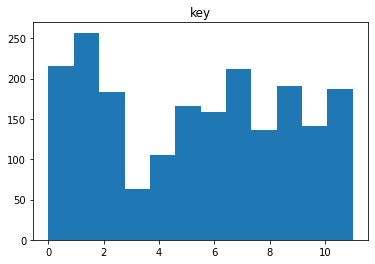

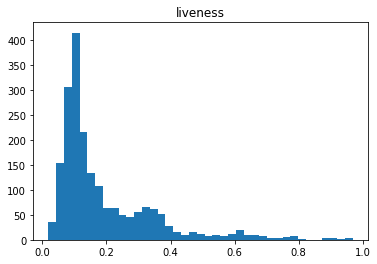

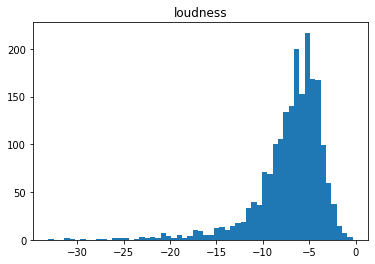

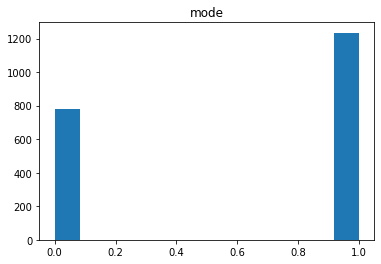

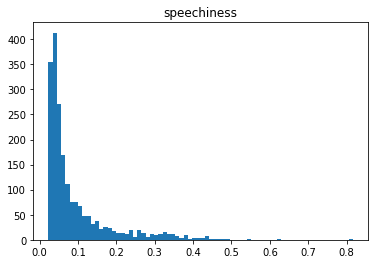

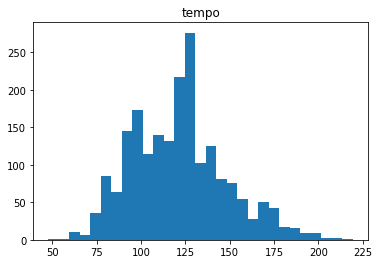

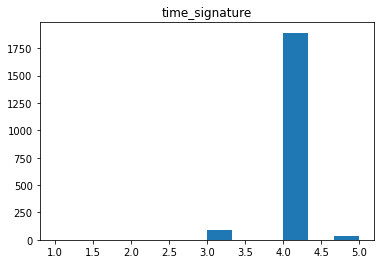

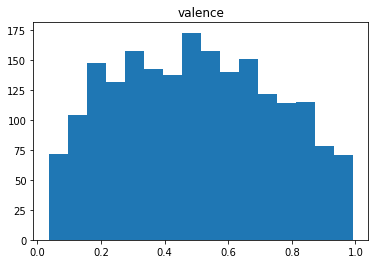

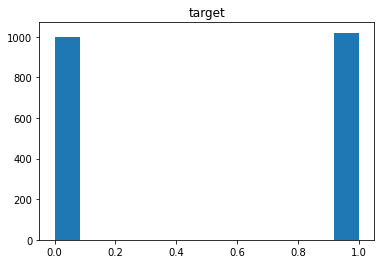

In [524]:
#['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence','target']
import matplotlib.pyplot as plt
plt.title('acousticness')
plt.hist(df['acousticness'], bins='auto')
plt.show()
plt.title('danceability')
plt.hist(df['danceability'], bins='auto')
plt.show()
plt.title('duration_ms')
plt.hist(df['duration_ms'], bins='auto')
plt.show()
plt.title('energy')
plt.hist(df['energy'], bins='auto')
plt.show()
plt.title('instrumentalness')
plt.hist(df['instrumentalness'], bins='auto')
plt.show()
plt.title('key')
plt.hist(df['key'], bins='auto')
plt.show()
plt.title('liveness')
plt.hist(df['liveness'], bins='auto')
plt.show()
plt.title('loudness')
plt.hist(df['loudness'], bins='auto')
plt.show()
plt.title('mode')
plt.hist(df['mode'], bins='auto')
plt.show()
plt.title('speechiness')
plt.hist(df['speechiness'], bins='auto')
plt.show()
plt.title('tempo')
plt.hist(df['tempo'], bins='auto')
plt.show()
plt.title('time_signature')
plt.hist(df['time_signature'], bins='auto')
plt.show()
plt.title('valence')
plt.hist(df['valence'], bins='auto')
plt.show()
plt.title('target')
plt.hist(df['target'], bins='auto')
plt.show()

En primer lugar, se puede ver que el dataset esta balanceado porque tiene la misma cantidad de targets positivos y negativos.

Por otro lado, analizando las caracteristicas, se puede ver que, tanto "acousticness" como "time_signature" e "instrumentalness", no aportan datos significativos al tataset. 

Por lo tanto, procedo a eliminarlos:

In [525]:
df_filt = df[['danceability','duration_ms','energy','key','liveness','loudness','mode','speechiness','tempo','valence','target']]

Ahora, repito todo lo anterior con mi dataset filtrado

In [526]:
from sklearn.preprocessing import scale
#Especifico caracteristicas a entrenar y target
x = df_filt[['danceability','duration_ms','energy','key','liveness','loudness','mode','speechiness','tempo','valence']]
y = df_filt['target']

#Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# Escalo las muestras y los targets para ayudar en el entrenamiento
x = scale(x)   
y = scale(y) 

#Creo y entreno el modelo
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(n_neighbors=45) #K = sqrt(N)
knn.fit(xtrain, ytrain)


#Obtengo el Score
score = knn.score(xtest, ytest)
print("Score: ", score)
print()

#Testeo
ypred = knn.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

#Obtengo el error comparando los targets originales del conjunto de datos de testeo y los targets predichos por el modelo entrenado
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)  # Error medio cuadrático
print("MSE: ", mse)
print()


Score:  0.6039603960396039

MSE:  0.39603960396039606



Como se puede ver, si bien el score no mejoro, los datos eliminados eran "irrelevantes" para el clasificador.